Question 1:-

1) 𝐴 =
    1 0
    0 1
    
Answer- Here C(A) is R2, since no of independents column vectors are two.

2) 𝐵 =
    1 2
    2 4

Answer- Here C(B) is R1, since no of independents column vector is 1.We can make column vector 2 as (C2 = 2*C1).

3) 𝐷 =
    1 2 3
    0 0 4
 
Answer- Here C(D) is R2, since no of independents column vectors are two. we can make Column vector 2 as ( C2 = 2*C1). So, no of independents vectors are 2 only.
    

Question 2

2) Write a program (in any convenient language, like Python/Matlab) that emulates
an user localization using GPS. Use the following steps for doing this emulation.
Also submit a report with relevant results and explainations.

(a) Fix the user at (100,100,100). Put 5 satellites at any random locations (you can
manually put their locations), and fix their positions. Now calculate the time it
takes for a signal to arrive from each one of these satellites to the user.

In [5]:
#Solution of Part a
import math
import random
user =[100,100,100] #user location

satellite_location=[]
for i in range(5):
    satellite_location.append(random.sample(range(500,1000), 3))  #randomly creating satellite locations

time =[]
for i in range(5):
    distance  = math.sqrt((satellite_location[i][0]-100)**2 +(satellite_location[i][1]-100)**2 +(satellite_location[i][2]-100)**2)
    
    speed = 300000  #speed in m/s
    time.append(distance/speed)
print(time) #print time in seconds for each satellite
    

[0.0037878093933037343, 0.0038796176787582216, 0.0036541133595503635, 0.003040228427090453, 0.003850864260858276]


(b) Now lets do the opposite operation, i.e. use the satellite locations and the
times to find out the location of the user. Check whether it is coming exactly
as (100,100,100).

In [6]:
import numpy as np

#Function yo calculate x vector from the calculated A and B matrix    
def calculate_x(A,B):
    a= np.array(A)
   
    b = np.linalg.inv(np.dot(a.T,A))
   
    c = np.dot(np.dot(b,a.T),B)
  
    return c

#function to calculate A and B matrix by the equations of the five satellities(location created randomly in first question)
def cal_A_cal_B(dist):
    
    #initiaalizing matrix A and matrix B as (4x4) and (4x1) each
    
    A = [ [ None for y in range( 4 ) ]
             for x in range( 4 ) ]
               
    B = [ [ None for y in range( 1 ) ]
             for x in range( 4 ) ]
               


    #calculating matrix element as the given in the pdf by solving equations of each satellite.
    for i in range(4):
        B[i][0] = (dist[i]**2 - dist[i+1]**2)
        for j in range(3):
            A[i][j] = 2*(satellite_location[i+1][j] -satellite_location[i][j])
            B[i][0] = B[i][0] - ((satellite_location[i][j])**2 -(satellite_location[i+1][j])**2) 
        A[i][3] = 2*(dist[i]-dist[i+1])
    return A,B

#initializing distance list
distance =[]


for i in range(5):
    distance.append(time[i]*300000)
    
#calculating A and B matrix    
A,B = cal_A_cal_B(distance)

#calculating x vector that gives the location of the user
x = calculate_x(A,B)

print("The location of a user is: ")
print(x[0:3])

print("Here the location is 100,100,100 as required")

The location of a user is: 
[[100.]
 [100.]
 [100.]]
Here the location is 100,100,100 as required


(c) Now add some random errors with the times (you can use function likes
“rand” in matlab). Check how much location inaccuracy it showing up.

In [7]:
#function to calculate distance of each satellite with some error delta.

def cal_distance(delta,speed):
    distance =[]
    for i in range(5):
        distance.append((time[i]+delta)*speed)
    return distance
    

#function to calculate inaccuracy 

def cal_inaccuracy(distance):
    
    A,B = cal_A_cal_B(distance)
    x= calculate_x(A,B)
  
    
   
    ds =0
    for i in range(3):
        ds  +=  (x[i]-100)**2
    
    inaccquarcy = math.sqrt(ds)
    
    return inaccquarcy




#delta is a random error         
delta = random.randint(1,10)

#calculating a new distance list by considering the error
dis = cal_distance(delta,300000)  

#calculating the inaccuracy in meters.
a= cal_inaccuracy(dis)


print("The Inaccuracy is ",a*1000," meters")

The Inaccuracy is  0.25709509362025473  meters


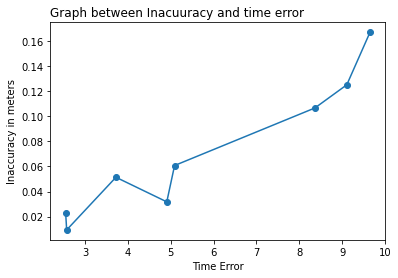

In [13]:
from numpy import random

#initializing loalization error list
localizationerror = []
#initializing time error list
time1=[]

#appending random time error  to time1 list
for i in range(8):
    time1.append(random.uniform(1,10))

#sort the time1 array  
time1.sort()

#calculating the new distance and inaccuracy with the time error
for i in time1:
    dis = cal_distance(i,300000)
   
    err = cal_inaccuracy(dis)
    localizationerror.append(err*1000)


#plotting the graph    

import matplotlib.pyplot as plt


#plotting the graph using matplotlib library
plt.scatter(time1,localizationerror)
plt.plot(time1,localizationerror)

#giving label to x-axis and y-axis
plt.title("Graph between Inacuuracy and time error", loc = 'left')
plt.xlabel("Time Error")
plt.ylabel("Inaccuracy in meters")

plt.show()